## Анализируем посты РБК

Это занятие посвящено разным способам предобработки текстов для дальнейшего анализа или обучения моделей машинного обучения, а также мы немного поисследуем собранные раннее посты из инстаграма РБК.

In [162]:
import pandas as pd
import numpy as np

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
df = pd.read_csv('rbc_df.csv')
df.head()

,date,comments,likes,text,url
0,10/11/2021 16:11:33,25,1812,"Переговоры — это столкновение двух и более противоборствующих сторон, где задачей каждой стоит: получить максимум, используя свои ресурсы и возможности. Если оппонент настаивает на чем-то, вы вполне можете ответить отказом. Но так, чтобы оппонент пошел на попятную. Рассмотрим методики, которые помогут сделать это",https://www.instagram.com/p/CWGgCllIUjK/
1,10/11/2021 11:10:42,327,2338,"У белорусско-польской границы мигранты, в большинстве из них — курды, разбили палаточный лагерь. С 8 ноября беженцы прибывают в пограничную зону целыми семьями, пытаясь прорваться в Европу. В ночь на 10 ноября двум большим группам мигрантов удалось повредить ограждения и оказаться на территории Польши. Их задержали. Как живут застрявшие у границы беженцы — в подборке РБК\n\n#РБК #рбк_новости #rbc #новости",https://www.instagram.com/p/CWF9nA6opvy/
2,09/11/2021 16:52:42,83,4252,Большинство из нас слышали про необходимость пройти 10 000 шагов в день для поддержания здоровья. Но откуда взялась эта цифра и действительно ли совет помогает держать себя в форме — об этом в карточках РБК Спорт\n\n#РБК #рбк_новости #rbc #статья #спорт,https://www.instagram.com/p/CWD_9EHIf_K/
3,09/11/2021 13:29:03,27,1500,"Покупка мужского костюма — интересный процесс, который в своем развитии преодолел ряд этапов. От долгих примерок до покупки в пару кликов. Вместе с Suitsupply рассказываем об этом в карточках. Листайте 👉\n\nСсылка на недавно открывшийся онлайн-магазин Suitsupply в описании профиля.",https://www.instagram.com/p/CWDophIN18s/
4,08/11/2021 15:45:42,44,2214,"Предприниматели грядущих десятилетий будут отличаться от своих предшественников, живших в середине прошлого столетия, или от наших современников. Основные тренды, влияющие на формирование предпринимателей будущего — в карточках и материале РБК Pro по ссылке в шапке профиля",https://www.instagram.com/p/CWBTfdnISbq/


In [68]:
df.tail()

,date,comments,likes,text,url
2706,21/03/2016 14:14:22,0,6,Строительство космодрома Восточный. \n\nФото: Алена Кондюрина (@tavka) для РБК,https://www.instagram.com/p/BDN9F0TFF9k/
2707,21/03/2016 14:13:27,0,21,Отдыхающие на набержной Ялты. \n\nФото: Катерина Садовски для РБК,https://www.instagram.com/p/BDN8_EPlF9S/
2708,21/03/2016 14:12:37,2,16,"Уничтожение санкционных продуктов, Подмосковье. \n\nФото: Олег Яковлев/РБК",https://www.instagram.com/p/BDN84-lFF9C/
2709,21/03/2016 13:58:48,0,5,Лечебно-реабилитационный центр для пожилых людей «Монино». \n\nФото: Алена Кондюрина (@tavka) для РБК,https://www.instagram.com/p/BDN7TsklF47/
2710,21/03/2016 13:19:41,0,22,Портрет президента Американской торговой палаты Алексея Родзянко. \n\nФото: Владислав Шатило/РБК,https://www.instagram.com/p/BDN21QRFF_D/


In [69]:
df.text.iloc[0]

'Переговоры — это столкновение двух и более противоборствующих сторон, где задачей каждой стоит: получить максимум, используя свои ресурсы и возможности. Если оппонент настаивает на чем-то, вы вполне можете ответить отказом. Но так, чтобы оппонент пошел на попятную. Рассмотрим методики, которые помогут сделать это'

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      2711 non-null   object
 1   comments  2711 non-null   int64 
 2   likes     2711 non-null   int64 
 3   text      2703 non-null   object
 4   url       2711 non-null   object
dtypes: int64(2), object(3)
memory usage: 106.0+ KB


## Маленький разведочный анализ данных (EDA, exploratory data analysis)

Средние больше медиан – значит, есть несколько выбросов (постов, которые набрали сильно больше лайков и комментов, чем большинство).

In [72]:
df.shape

(2711, 5)

In [73]:
df.describe()

,comments,likes
count,2711.000000,2711.000000
mean,131.238657,2163.443379
std,203.748409,2728.772495
min,0.000000,4.000000
25%,14.000000,352.000000
50%,55.000000,1302.000000
75%,160.000000,2923.500000
max,2458.000000,24298.000000


In [74]:
df.describe(include=['object'])

,date,text,url
count,2711,2711,2711
unique,2711,2438,2711
top,10/11/2021 16:11:33,"ЧЭЗ Next - ежедневный информационный марафон в прямом эфире Instagram. Каждый вечер обсуждаем главные новости дня, подключаем к эфиру экспертов, корреспондентов и участников событий. Отвечаем на вопросы зрителей. Что это значит? #ЧЭЗNext - разбираемся, объясняем, общаемся. #первоеинфошоучэзnext #первоеинфошоу #чэз #чтоэтозначит #rbc #рбк",https://www.instagram.com/p/CWGgCllIUjK/
freq,1,224,1


In [75]:
df['text'].drop_duplicates(inplace=True)

Посмотрим на выбросы:

In [76]:
pd.set_option('display.max_colwidth', None) # показ длинных строк в таблице в консоли

In [77]:
df.sort_values('likes', ascending=False)[:10]

,date,comments,likes,text,url
227,13/08/2021 12:58:46,1023,24298,"Приносят ли деньги счастье? Фундаментальный вопрос, который волнует не только предпринимателей. \n\nВспоминаем все еще актуальные слова Андрея Трубникова из интервью РБК трехлетней давности. \n\nСтавьте лайк и делитесь этим видео, поддержите наш новый формат 🤝",https://www.instagram.com/p/CSg_JurnvHJ/
118,24/09/2021 08:31:30,1416,22825,"Утром 23 сентября группа из 23 человек, состоявшая из жителей разных регионов России, начала восхождение на гору Эльбрус. На первом этапе восхождения несколько человек отказались от дальнейшего подъема и направились вниз. Оставшиеся 19 человек, несмотря на усложняющиеся погодные условия, продолжили подъем.\n⠀\nПримерно в 14:00 начался сильный ветер и пурга, группа оказалась в условиях плохой видимости, до одного метра, и температуры ниже -20 градусов. По решению гидов, группа разделилась. Во время спуска пять человек погибли, по предварительным данным причиной их гибели стало переохлаждение. Остальных эвакуировали спасатели.\n⠀\nВ МЧС также рассказали, что гид, который привел альпинистов наверх, бросил их и начал спускаться сам, его встретили спасатели во время поисковых работ, передает ТАСС. Возбуждено уголовное дело по ч.3 ст.238 УК РФ (оказание услуг, не отвечающих требованиям безопасности жизни и здоровья потребителя, повлекшие по неосторожности смерть двух и более лиц)",https://www.instagram.com/p/CUMqB4RAmDA/
224,14/08/2021 09:30:27,677,22356,Создатель розничной сети «Магнит» Сергей Галицкий отмечает сегодня День рождения. Собрали яркие высказывания бизнесмена,https://www.instagram.com/p/CSjML2LD35u/
1461,02/04/2020 17:16:50,633,21599,"Денис Проценко опубликовал на своей страницы в Facebook портреты сотрудников больницы №40 в Коммунарке, которые борются с коронавирусом COVID-19. «Москва. Коммунарка. 2020. Наши сверхлюди! Медики (медсестры, врачи, фельдшера, лаборанты, рентгентехники) и немедики (техническая служба, ремонтники, клининг, айти, экономисты и бухгалтера)», — написал Проценко, призвал посписчиков распространить пост с хештегом #сверхлюди.\n⠀\n#рбк #rbc #rbcновости #россия #москва #коронавирус #covid19 #коммунарка #ркб40 #врачи #сверхлюди",https://www.instagram.com/p/B-fI5AxFpoR/
271,29/07/2021 21:02:22,205,21474,💪,https://www.instagram.com/p/CR7OpjqLRZ5/
128,21/09/2021 06:33:18,1088,20517,"Правда ли зумеры охладели к сексу, позже женятся и не хотят заводить детей? На эти вопросы РБК Трендам ответил психолог Александр Рикель. Он рассказал, как современная молодежь воспринимает отношения и почему прагматичный подход к романтике стал нормой.",https://www.instagram.com/p/CUEuHm3AOWg/
281,27/07/2021 07:33:37,499,20116,😍,https://www.instagram.com/p/CR0ogVIHgRm/
278,27/07/2021 16:48:37,446,18965,"В четвертый игровой день на Олимпиаде в Токио российские спортсмены завоевали сразу шесть медалей — три из них высшей пробы. Причем все три золота достойны того, чтобы войти в историю\n⠀\n#рбк #rbc #рбк_новости",https://www.instagram.com/p/CR1oBUcJUpB/
77,10/10/2021 07:10:59,199,18716,Основатель ВКонтакте и Telegram Павел Дуров празднует сегодня свой 37-й день рождения,https://www.instagram.com/p/CU1tiLYImZ_/
692,27/03/2021 08:03:29,537,17779,"Российская фигуристка 16-летняя Анна Щербакова стала чемпионкой мира в женском одиночном катании. Второе место заняла Елизавета Туктамышева. Третье — Александра Трусова. Она стала первой в истории фигуристкой, которая заявила пять четверных прыжков в произвольной программе. Трусова и Щербакова являются дебютантками чемпионата мира, который не проводился в 2020 году из-за пандемии. \n\nВпервые в истории россиянки заняли весь пьедестал на мировом первенстве. Вместо гимна при награждении звучал фрагмент из Концерта №1 для фортепиано с оркестром Петра Чайковского.\n\n#рбк #rbc #rbc_новости #фигурноекатание #чм #россия",https://www.instagram.com/p/CM6i8UylnTo/


В первые 10 постов по количеству лайков вошли несколько размышлений бизнесменов о карьере и успехе (Андрей Трубников, Сергей Галицкий, Павел Дуров), вдохновляющие истории (туристы, выжившие на Эльбрусе, благодарность врачам) и несколько новостей про победы в спорте.

Посмотрим на гистограмму распределения лайков:

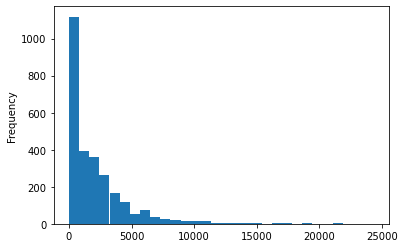

In [78]:
df['likes'].plot.hist(bins=30);

In [79]:
(df['likes'].max() - df['likes'].min()) / 30

809.8

In [80]:
df['likes'].min()

4

На данной гистограмме отмечается частота попадений значений в 30 заданных интервалов. Видно, что у большой части постов лайков не очень много. Проверим, сколько их.

In [81]:
df[df['likes'] < 810].shape[0]

1118

У 1118 постов меньше, чем 814 лайков. При этом есть ряд постов, у которых более 20000 лайков.

Посмотрим, как лайки зависят от времени публикации.

In [82]:
df.head()

,date,comments,likes,text,url
0,10/11/2021 16:11:33,25,1812,"Переговоры — это столкновение двух и более противоборствующих сторон, где задачей каждой стоит: получить максимум, используя свои ресурсы и возможности. Если оппонент настаивает на чем-то, вы вполне можете ответить отказом. Но так, чтобы оппонент пошел на попятную. Рассмотрим методики, которые помогут сделать это",https://www.instagram.com/p/CWGgCllIUjK/
1,10/11/2021 11:10:42,327,2338,"У белорусско-польской границы мигранты, в большинстве из них — курды, разбили палаточный лагерь. С 8 ноября беженцы прибывают в пограничную зону целыми семьями, пытаясь прорваться в Европу. В ночь на 10 ноября двум большим группам мигрантов удалось повредить ограждения и оказаться на территории Польши. Их задержали. Как живут застрявшие у границы беженцы — в подборке РБК\n\n#РБК #рбк_новости #rbc #новости",https://www.instagram.com/p/CWF9nA6opvy/
2,09/11/2021 16:52:42,83,4252,Большинство из нас слышали про необходимость пройти 10 000 шагов в день для поддержания здоровья. Но откуда взялась эта цифра и действительно ли совет помогает держать себя в форме — об этом в карточках РБК Спорт\n\n#РБК #рбк_новости #rbc #статья #спорт,https://www.instagram.com/p/CWD_9EHIf_K/
3,09/11/2021 13:29:03,27,1500,"Покупка мужского костюма — интересный процесс, который в своем развитии преодолел ряд этапов. От долгих примерок до покупки в пару кликов. Вместе с Suitsupply рассказываем об этом в карточках. Листайте 👉\n\nСсылка на недавно открывшийся онлайн-магазин Suitsupply в описании профиля.",https://www.instagram.com/p/CWDophIN18s/
4,08/11/2021 15:45:42,44,2214,"Предприниматели грядущих десятилетий будут отличаться от своих предшественников, живших в середине прошлого столетия, или от наших современников. Основные тренды, влияющие на формирование предпринимателей будущего — в карточках и материале РБК Pro по ссылке в шапке профиля",https://www.instagram.com/p/CWBTfdnISbq/


In [83]:
df['date'] = pd.to_datetime(df['date'])

In [84]:
df['hour'] = df['date'].dt.hour

In [85]:
df['count'] = 1

In [86]:
df

,date,comments,likes,text,url,hour,count
0,2021-10-11 16:11:33,25,1812,"Переговоры — это столкновение двух и более противоборствующих сторон, где задачей каждой стоит: получить максимум, используя свои ресурсы и возможности. Если оппонент настаивает на чем-то, вы вполне можете ответить отказом. Но так, чтобы оппонент пошел на попятную. Рассмотрим методики, которые помогут сделать это",https://www.instagram.com/p/CWGgCllIUjK/,16,1
1,2021-10-11 11:10:42,327,2338,"У белорусско-польской границы мигранты, в большинстве из них — курды, разбили палаточный лагерь. С 8 ноября беженцы прибывают в пограничную зону целыми семьями, пытаясь прорваться в Европу. В ночь на 10 ноября двум большим группам мигрантов удалось повредить ограждения и оказаться на территории Польши. Их задержали. Как живут застрявшие у границы беженцы — в подборке РБК\n\n#РБК #рбк_новости #rbc #новости",https://www.instagram.com/p/CWF9nA6opvy/,11,1
2,2021-09-11 16:52:42,83,4252,Большинство из нас слышали про необходимость пройти 10 000 шагов в день для поддержания здоровья. Но откуда взялась эта цифра и действительно ли совет помогает держать себя в форме — об этом в карточках РБК Спорт\n\n#РБК #рбк_новости #rbc #статья #спорт,https://www.instagram.com/p/CWD_9EHIf_K/,16,1
3,2021-09-11 13:29:03,27,1500,"Покупка мужского костюма — интересный процесс, который в своем развитии преодолел ряд этапов. От долгих примерок до покупки в пару кликов. Вместе с Suitsupply рассказываем об этом в карточках. Листайте 👉\n\nСсылка на недавно открывшийся онлайн-магазин Suitsupply в описании профиля.",https://www.instagram.com/p/CWDophIN18s/,13,1
4,2021-08-11 15:45:42,44,2214,"Предприниматели грядущих десятилетий будут отличаться от своих предшественников, живших в середине прошлого столетия, или от наших современников. Основные тренды, влияющие на формирование предпринимателей будущего — в карточках и материале РБК Pro по ссылке в шапке профиля",https://www.instagram.com/p/CWBTfdnISbq/,15,1
...,...,...,...,...,...,...,...
2706,2016-03-21 14:14:22,0,6,Строительство космодрома Восточный. \n\nФото: Алена Кондюрина (@tavka) для РБК,https://www.instagram.com/p/BDN9F0TFF9k/,14,1
2707,2016-03-21 14:13:27,0,21,Отдыхающие на набержной Ялты. \n\nФото: Катерина Садовски для РБК,https://www.instagram.com/p/BDN8_EPlF9S/,14,1
2708,2016-03-21 14:12:37,2,16,"Уничтожение санкционных продуктов, Подмосковье. \n\nФото: Олег Яковлев/РБК",https://www.instagram.com/p/BDN84-lFF9C/,14,1
2709,2016-03-21 13:58:48,0,5,Лечебно-реабилитационный центр для пожилых людей «Монино». \n\nФото: Алена Кондюрина (@tavka) для РБК,https://www.instagram.com/p/BDN7TsklF47/,13,1


In [87]:
df.head()

,date,comments,likes,text,url,hour,count
0,2021-10-11 16:11:33,25,1812,"Переговоры — это столкновение двух и более противоборствующих сторон, где задачей каждой стоит: получить максимум, используя свои ресурсы и возможности. Если оппонент настаивает на чем-то, вы вполне можете ответить отказом. Но так, чтобы оппонент пошел на попятную. Рассмотрим методики, которые помогут сделать это",https://www.instagram.com/p/CWGgCllIUjK/,16,1
1,2021-10-11 11:10:42,327,2338,"У белорусско-польской границы мигранты, в большинстве из них — курды, разбили палаточный лагерь. С 8 ноября беженцы прибывают в пограничную зону целыми семьями, пытаясь прорваться в Европу. В ночь на 10 ноября двум большим группам мигрантов удалось повредить ограждения и оказаться на территории Польши. Их задержали. Как живут застрявшие у границы беженцы — в подборке РБК\n\n#РБК #рбк_новости #rbc #новости",https://www.instagram.com/p/CWF9nA6opvy/,11,1
2,2021-09-11 16:52:42,83,4252,Большинство из нас слышали про необходимость пройти 10 000 шагов в день для поддержания здоровья. Но откуда взялась эта цифра и действительно ли совет помогает держать себя в форме — об этом в карточках РБК Спорт\n\n#РБК #рбк_новости #rbc #статья #спорт,https://www.instagram.com/p/CWD_9EHIf_K/,16,1
3,2021-09-11 13:29:03,27,1500,"Покупка мужского костюма — интересный процесс, который в своем развитии преодолел ряд этапов. От долгих примерок до покупки в пару кликов. Вместе с Suitsupply рассказываем об этом в карточках. Листайте 👉\n\nСсылка на недавно открывшийся онлайн-магазин Suitsupply в описании профиля.",https://www.instagram.com/p/CWDophIN18s/,13,1
4,2021-08-11 15:45:42,44,2214,"Предприниматели грядущих десятилетий будут отличаться от своих предшественников, живших в середине прошлого столетия, или от наших современников. Основные тренды, влияющие на формирование предпринимателей будущего — в карточках и материале РБК Pro по ссылке в шапке профиля",https://www.instagram.com/p/CWBTfdnISbq/,15,1


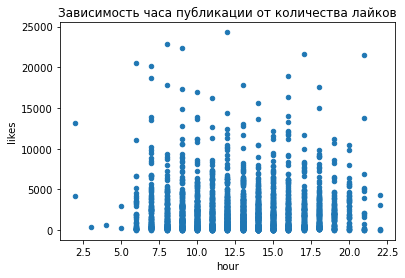

In [88]:
df.plot(x='hour', y='likes', kind='scatter',
       title='Зависимость часа публикации от количества лайков');

In [89]:
df.head()

,date,comments,likes,text,url,hour,count
0,2021-10-11 16:11:33,25,1812,"Переговоры — это столкновение двух и более противоборствующих сторон, где задачей каждой стоит: получить максимум, используя свои ресурсы и возможности. Если оппонент настаивает на чем-то, вы вполне можете ответить отказом. Но так, чтобы оппонент пошел на попятную. Рассмотрим методики, которые помогут сделать это",https://www.instagram.com/p/CWGgCllIUjK/,16,1
1,2021-10-11 11:10:42,327,2338,"У белорусско-польской границы мигранты, в большинстве из них — курды, разбили палаточный лагерь. С 8 ноября беженцы прибывают в пограничную зону целыми семьями, пытаясь прорваться в Европу. В ночь на 10 ноября двум большим группам мигрантов удалось повредить ограждения и оказаться на территории Польши. Их задержали. Как живут застрявшие у границы беженцы — в подборке РБК\n\n#РБК #рбк_новости #rbc #новости",https://www.instagram.com/p/CWF9nA6opvy/,11,1
2,2021-09-11 16:52:42,83,4252,Большинство из нас слышали про необходимость пройти 10 000 шагов в день для поддержания здоровья. Но откуда взялась эта цифра и действительно ли совет помогает держать себя в форме — об этом в карточках РБК Спорт\n\n#РБК #рбк_новости #rbc #статья #спорт,https://www.instagram.com/p/CWD_9EHIf_K/,16,1
3,2021-09-11 13:29:03,27,1500,"Покупка мужского костюма — интересный процесс, который в своем развитии преодолел ряд этапов. От долгих примерок до покупки в пару кликов. Вместе с Suitsupply рассказываем об этом в карточках. Листайте 👉\n\nСсылка на недавно открывшийся онлайн-магазин Suitsupply в описании профиля.",https://www.instagram.com/p/CWDophIN18s/,13,1
4,2021-08-11 15:45:42,44,2214,"Предприниматели грядущих десятилетий будут отличаться от своих предшественников, живших в середине прошлого столетия, или от наших современников. Основные тренды, влияющие на формирование предпринимателей будущего — в карточках и материале РБК Pro по ссылке в шапке профиля",https://www.instagram.com/p/CWBTfdnISbq/,15,1


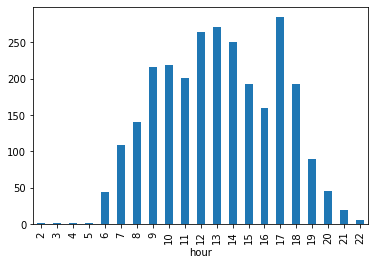

In [90]:
df.groupby('hour')['count'].sum().plot(kind='bar');

In [91]:
df_new = df[df['hour'] != 2]

In [92]:
df_new.shape

(2709, 7)

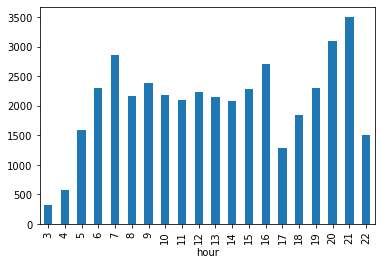

In [93]:
df_new.groupby('hour')['likes'].mean().plot(kind='bar');

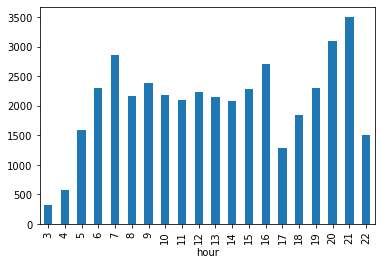

In [94]:
(df[df['hour'] != 2]).groupby('hour')['likes'].mean().plot(kind='bar');

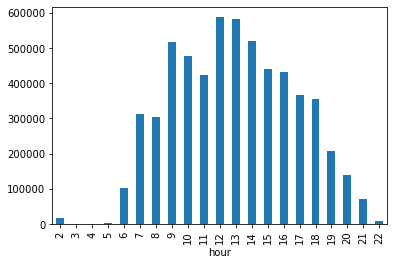

In [95]:
df.groupby('hour')['likes'].sum().plot(kind='bar');

In [96]:
df[df['hour'] != 2]

,date,comments,likes,text,url,hour,count
0,2021-10-11 16:11:33,25,1812,"Переговоры — это столкновение двух и более противоборствующих сторон, где задачей каждой стоит: получить максимум, используя свои ресурсы и возможности. Если оппонент настаивает на чем-то, вы вполне можете ответить отказом. Но так, чтобы оппонент пошел на попятную. Рассмотрим методики, которые помогут сделать это",https://www.instagram.com/p/CWGgCllIUjK/,16,1
1,2021-10-11 11:10:42,327,2338,"У белорусско-польской границы мигранты, в большинстве из них — курды, разбили палаточный лагерь. С 8 ноября беженцы прибывают в пограничную зону целыми семьями, пытаясь прорваться в Европу. В ночь на 10 ноября двум большим группам мигрантов удалось повредить ограждения и оказаться на территории Польши. Их задержали. Как живут застрявшие у границы беженцы — в подборке РБК\n\n#РБК #рбк_новости #rbc #новости",https://www.instagram.com/p/CWF9nA6opvy/,11,1
2,2021-09-11 16:52:42,83,4252,Большинство из нас слышали про необходимость пройти 10 000 шагов в день для поддержания здоровья. Но откуда взялась эта цифра и действительно ли совет помогает держать себя в форме — об этом в карточках РБК Спорт\n\n#РБК #рбк_новости #rbc #статья #спорт,https://www.instagram.com/p/CWD_9EHIf_K/,16,1
3,2021-09-11 13:29:03,27,1500,"Покупка мужского костюма — интересный процесс, который в своем развитии преодолел ряд этапов. От долгих примерок до покупки в пару кликов. Вместе с Suitsupply рассказываем об этом в карточках. Листайте 👉\n\nСсылка на недавно открывшийся онлайн-магазин Suitsupply в описании профиля.",https://www.instagram.com/p/CWDophIN18s/,13,1
4,2021-08-11 15:45:42,44,2214,"Предприниматели грядущих десятилетий будут отличаться от своих предшественников, живших в середине прошлого столетия, или от наших современников. Основные тренды, влияющие на формирование предпринимателей будущего — в карточках и материале РБК Pro по ссылке в шапке профиля",https://www.instagram.com/p/CWBTfdnISbq/,15,1
...,...,...,...,...,...,...,...
2706,2016-03-21 14:14:22,0,6,Строительство космодрома Восточный. \n\nФото: Алена Кондюрина (@tavka) для РБК,https://www.instagram.com/p/BDN9F0TFF9k/,14,1
2707,2016-03-21 14:13:27,0,21,Отдыхающие на набержной Ялты. \n\nФото: Катерина Садовски для РБК,https://www.instagram.com/p/BDN8_EPlF9S/,14,1
2708,2016-03-21 14:12:37,2,16,"Уничтожение санкционных продуктов, Подмосковье. \n\nФото: Олег Яковлев/РБК",https://www.instagram.com/p/BDN84-lFF9C/,14,1
2709,2016-03-21 13:58:48,0,5,Лечебно-реабилитационный центр для пожилых людей «Монино». \n\nФото: Алена Кондюрина (@tavka) для РБК,https://www.instagram.com/p/BDN7TsklF47/,13,1


In [97]:
df[df['hour'] == 12].shape[0]

264

In [98]:
del df['count']

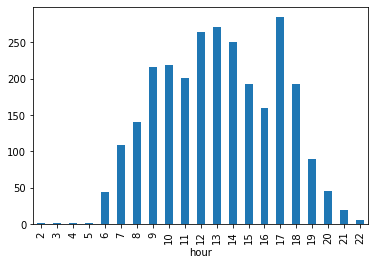

In [99]:
df.groupby('hour')['comments'].count().plot(kind = 'bar');

In [100]:
df[df['hour'] == 12]

,date,comments,likes,text,url,hour
8,2021-06-11 12:06:56,550,3274,"В Коста-Рике детей в возрасте от 5 до 11 лет будут прививать препаратом компании Pfizer. Ранее его применение в этой возрастной группе одобрили в США.\n⠀\nВласти Коста-Рики включили вакцинацию от COVID-19 в список обязательных для населения еще в марте. Однако до этого времени требование касалось взрослых и подростков от 12 лет.\n⠀\nВакцина будет вводиться в двух дозах по 10 мкг, что составляет треть от количества, получаемого подростками и взрослыми. Дозы будут распределены с интервалом в три недели.",https://www.instagram.com/p/CV7w3ajIwAd/,12
12,2021-04-11 12:38:54,60,4057,"В 1979 году Сергей Брин переехал из СССР в США, в 1990-х стал сооснователем Google, а в 2021-м занял 9 место в списке богатейших людей по версии Forbes. Какие книги вдохновили его, читайте в подборке РБК Трендов",https://www.instagram.com/p/CV2q7wLoA8e/,12
19,2021-02-11 12:47:43,64,6266,С вечера понедельника Москву окутал плотный туман. Вот как выглядели МГУ и «Москва-Сити» утром во вторник\n\n#РБК #рбк_новости #rbc,https://www.instagram.com/p/CVxiWqyIgyO/,12
27,2021-10-30 12:30:31,233,2622,"В 2020 году 60% россиян отрицательно относились к феминитивам. РБК Тренды разбираются, почему многие негативно реагируют на «авторок» и «врачинь», но совсем не против «медсестер» и «балерин»",https://www.instagram.com/p/CVpx_9fotZ6/,12
30,2021-10-29 12:47:12,67,4025,"Компания Facebook, которой принадлежат одноименная соцсеть, сервисы WhatsApp, Instagram и другие, объявила, что сменит название на Meta. Основатель компании Марк Цукерберг объяснил, что такое решение поможет отделить название от одного из продуктов, чтобы пользователи воспринимали компанию как «метавселенную». Как отреагировали на ребрендинг в соцсетях — в карточках РБК\n\n#РБК #рбк_новости #rbc #новости",https://www.instagram.com/p/CVnPHVbo9LE/,12
...,...,...,...,...,...,...
2646,2017-01-09 12:21:20,0,44,"«Для танго нужны двое, а США исполняют индивидуальный брейк-данс», — Россия не ищет ссоры с США, заявил Сергей Лавров. По словам министра, именно Вашингтон не готов к конструктивному диалогу. \n#рбк #лавров #новости #танцы",https://www.instagram.com/p/BYf4qvDjXYM/,12
2680,2016-04-23 12:36:56,1,35,"«Я хотел кардинально изменить жизнь». Бывший гендиректор и акционер розничной сети «Лента» Сергей Ющенко переехал в Западную Африку, чтобы начать в Гане строительство новой сети магазинов под названием Yoo! Mart. © Андрей Ковалев для РБК © Businessman Sergei Yushchenko by Andrey Kovalev for RBC from Ghana",https://www.instagram.com/p/BEiwLBIFF9Q/,12
2685,2016-06-04 12:27:12,1,12,"Федор Аптекарев, основатель компании Здравпринт, внедряет ЗD принтеры в медицину. Александр Карнюхин (@karnyukhin) для РБК.",https://www.instagram.com/p/BD29i1ZlF3o/,12
2691,2016-03-29 12:00:38,3,12,"Аркадий Ротенберг, бизнесмен. Екатерина Кузьмина/РБК\n Russian businessman Arkady Rotenberg by Ekaterina Kuzmina/RBC",https://www.instagram.com/p/BDiUJOcFF0f/,12


Какой-то очевидной зависимости не наблюдается. 

## Облако слов

Облако слов удобно для красивой и наглядной презентации слов, которые наиболее часто встречаются в тексте. Для его построения установим библиотеку wordcloud. 

In [101]:
!pip install wordcloud

In [102]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #стоп-слова (предлоги, союзы, частицы, местоимения)

In [103]:
# ?WordCloud

Нарисуем облако слов для одного поста:

In [104]:
text = df['text'][2000]

text

'В декабре 2018 года россияне оформили больше микрокредитов на подарки близким, чем за аналогичный период годом ранее, подсчитали в SmartCredit. Рост микрокредитования зафиксирован более чем в 80 регионах. По данным МФО, чаще других (44,6%) заемные средства на подарки используют люди в возрасте до 30 лет. Из общего «новогоднего бюджета» (в среднем в 2018-м эта сумма составляет ₽16,9 тыс.) на подарки планируется направить 42%. Активнее всего покупатели берут займы на популярные гаджеты.\n⠀\nКроме того, россияне поставили новый рекорд на рынке ипотеки: в ноябре банки выдали кредитов на ₽300 млрд руб. Ажиотаж вызван планируемым повышением ставок. В декабре кредитов может быть выдано еще больше, ожидают эксперты.\n\n#рбк #rbc #rbcновости #россия #новыйгод #праздник #статистика #москва #подарки #новыйгод #праздниккнамприходит #доход #зарплата #ипотека'

In [105]:
wordcloud = WordCloud().generate(text)
wordcloud

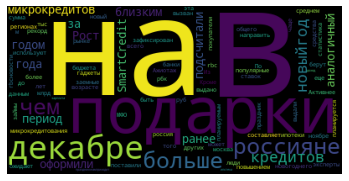

In [106]:
plt.imshow(wordcloud) # отрисовывает картинку
plt.axis("off") # убирает оси и подписи к ним
plt.show()

Нарисуем облако слов для всех постов:

In [107]:
text = " ".join(df['text'].to_list())
print ("Во всех собранных постах суммарно содержится {} слов.".format(len(text.split())))

Во всех собранных постах суммарно содержится 172473 слов.


In [108]:
wordcloud = WordCloud(background_color="white").generate(text)

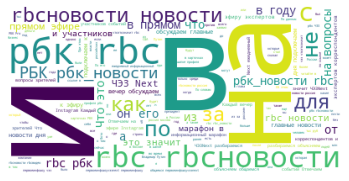

In [109]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Мы столкнулись с необходимостью предобратки сырого текста. Как видите, самые частые слова – это предлоги "на", "и", "в". Они не несут никакого глубокого смысла и никак не помогают нашему анализу текстов. Такие слова называются стоп-словами. Как правило, первый шаг в работе с текстом – это очищение его от пунктуации и стоп-слов.

Перед тем, как начать работать с текстом, удалим посты, где описания состоят из эмодзи.

In [110]:
df = df[df['text'].apply(len) > 5]

In [111]:
df['text'].apply(len)

0       314
1       406
2       251
3       280
4       273
       ... 
2706     76
2707     63
2708     72
2709     99
2710     94
Name: text, Length: 2688, dtype: int64

## Стоп-слова и пунктуация

**Стоп-слова** - это слова, которые часто встречаются практически в любом тексте и ничего интересного не говорят о конретном документе. Для модели это просто шум. А шум нужно убирать. По аналогичной причине убирают и пунктуацию.

In [112]:
# pip install nltk

In [113]:
# импортируем стоп-слова из библиотеки nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# посмотрим на стоп-слова для русского языка
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kasyanenko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

*Знаки* пунктуации лучше импортировать из модуля **String**. В нем хранятся различные наборы констант для работы со строками (пунктуация, алфавит и др.). 

In [115]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Объединим стоп-слова и знаки пунктуации вместе и запишем в переменную ```noise```:

In [116]:
noise = stopwords.words('russian')
punctuation_new = list(punctuation) + list('»') + list('«')

In [117]:
noise[-2]

'всю'

In [118]:
noise[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

Удалить стоп-слова можно вручную. Например, так:

In [119]:
text = df['text'][10]
text

'Давно хотели поменять направление в работе, но все никак не решались? Переходите по ссылке в шапке профиля и читайте полезные рекомендации от РБК Pro. Эксперты по рекрутингу, профессиональному росту и развитию команд делятся карьерными советами, которые помогут получить «работу мечты».'

In [120]:
# удаляем пунктуацию
no_punct_text = ''.join([s for s in text if s not in punctuation_new])
# удаляем стоп-слова
clean_text = [word for word in no_punct_text.lower().split() if word not in 
              stopwords.words('russian')]
' '.join(clean_text)

'давно хотели поменять направление работе никак решались переходите ссылке шапке профиля читайте полезные рекомендации рбк pro эксперты рекрутингу профессиональному росту развитию команд делятся карьерными советами которые помогут получить работу мечты'

In [121]:
def remove_stopwords(text):
    no_punct_text = ''.join([s for s in text if s not in punctuation])
    clean_text = [word for word in no_punct_text.lower().split()
                  if word not in noise]
    return ' '.join(clean_text)

In [122]:
df['text_no_stopwords'] = df['text'].apply(remove_stopwords)

In [123]:
df.head()

,date,comments,likes,text,url,hour,text_no_stopwords
0,2021-10-11 16:11:33,25,1812,"Переговоры — это столкновение двух и более противоборствующих сторон, где задачей каждой стоит: получить максимум, используя свои ресурсы и возможности. Если оппонент настаивает на чем-то, вы вполне можете ответить отказом. Но так, чтобы оппонент пошел на попятную. Рассмотрим методики, которые помогут сделать это",https://www.instagram.com/p/CWGgCllIUjK/,16,переговоры — это столкновение двух противоборствующих сторон задачей каждой стоит получить максимум используя свои ресурсы возможности оппонент настаивает чемто вполне можете ответить отказом оппонент пошел попятную рассмотрим методики которые помогут сделать это
1,2021-10-11 11:10:42,327,2338,"У белорусско-польской границы мигранты, в большинстве из них — курды, разбили палаточный лагерь. С 8 ноября беженцы прибывают в пограничную зону целыми семьями, пытаясь прорваться в Европу. В ночь на 10 ноября двум большим группам мигрантов удалось повредить ограждения и оказаться на территории Польши. Их задержали. Как живут застрявшие у границы беженцы — в подборке РБК\n\n#РБК #рбк_новости #rbc #новости",https://www.instagram.com/p/CWF9nA6opvy/,11,белорусскопольской границы мигранты большинстве — курды разбили палаточный лагерь 8 ноября беженцы прибывают пограничную зону целыми семьями пытаясь прорваться европу ночь 10 ноября двум большим группам мигрантов удалось повредить ограждения оказаться территории польши задержали живут застрявшие границы беженцы — подборке рбк рбк рбкновости rbc новости
2,2021-09-11 16:52:42,83,4252,Большинство из нас слышали про необходимость пройти 10 000 шагов в день для поддержания здоровья. Но откуда взялась эта цифра и действительно ли совет помогает держать себя в форме — об этом в карточках РБК Спорт\n\n#РБК #рбк_новости #rbc #статья #спорт,https://www.instagram.com/p/CWD_9EHIf_K/,16,большинство слышали необходимость пройти 10 000 шагов день поддержания здоровья откуда взялась эта цифра действительно совет помогает держать форме — карточках рбк спорт рбк рбкновости rbc статья спорт
3,2021-09-11 13:29:03,27,1500,"Покупка мужского костюма — интересный процесс, который в своем развитии преодолел ряд этапов. От долгих примерок до покупки в пару кликов. Вместе с Suitsupply рассказываем об этом в карточках. Листайте 👉\n\nСсылка на недавно открывшийся онлайн-магазин Suitsupply в описании профиля.",https://www.instagram.com/p/CWDophIN18s/,13,покупка мужского костюма — интересный процесс который своем развитии преодолел ряд этапов долгих примерок покупки пару кликов вместе suitsupply рассказываем карточках листайте 👉 ссылка недавно открывшийся онлайнмагазин suitsupply описании профиля
4,2021-08-11 15:45:42,44,2214,"Предприниматели грядущих десятилетий будут отличаться от своих предшественников, живших в середине прошлого столетия, или от наших современников. Основные тренды, влияющие на формирование предпринимателей будущего — в карточках и материале РБК Pro по ссылке в шапке профиля",https://www.instagram.com/p/CWBTfdnISbq/,15,предприниматели грядущих десятилетий будут отличаться своих предшественников живших середине прошлого столетия наших современников основные тренды влияющие формирование предпринимателей будущего — карточках материале рбк pro ссылке шапке профиля


Отрисуем заново облако слов:

In [124]:
text = " ".join(df['text_no_stopwords'].to_list())

In [125]:
wordcloud = WordCloud(background_color="white", 
                     ).generate(text)

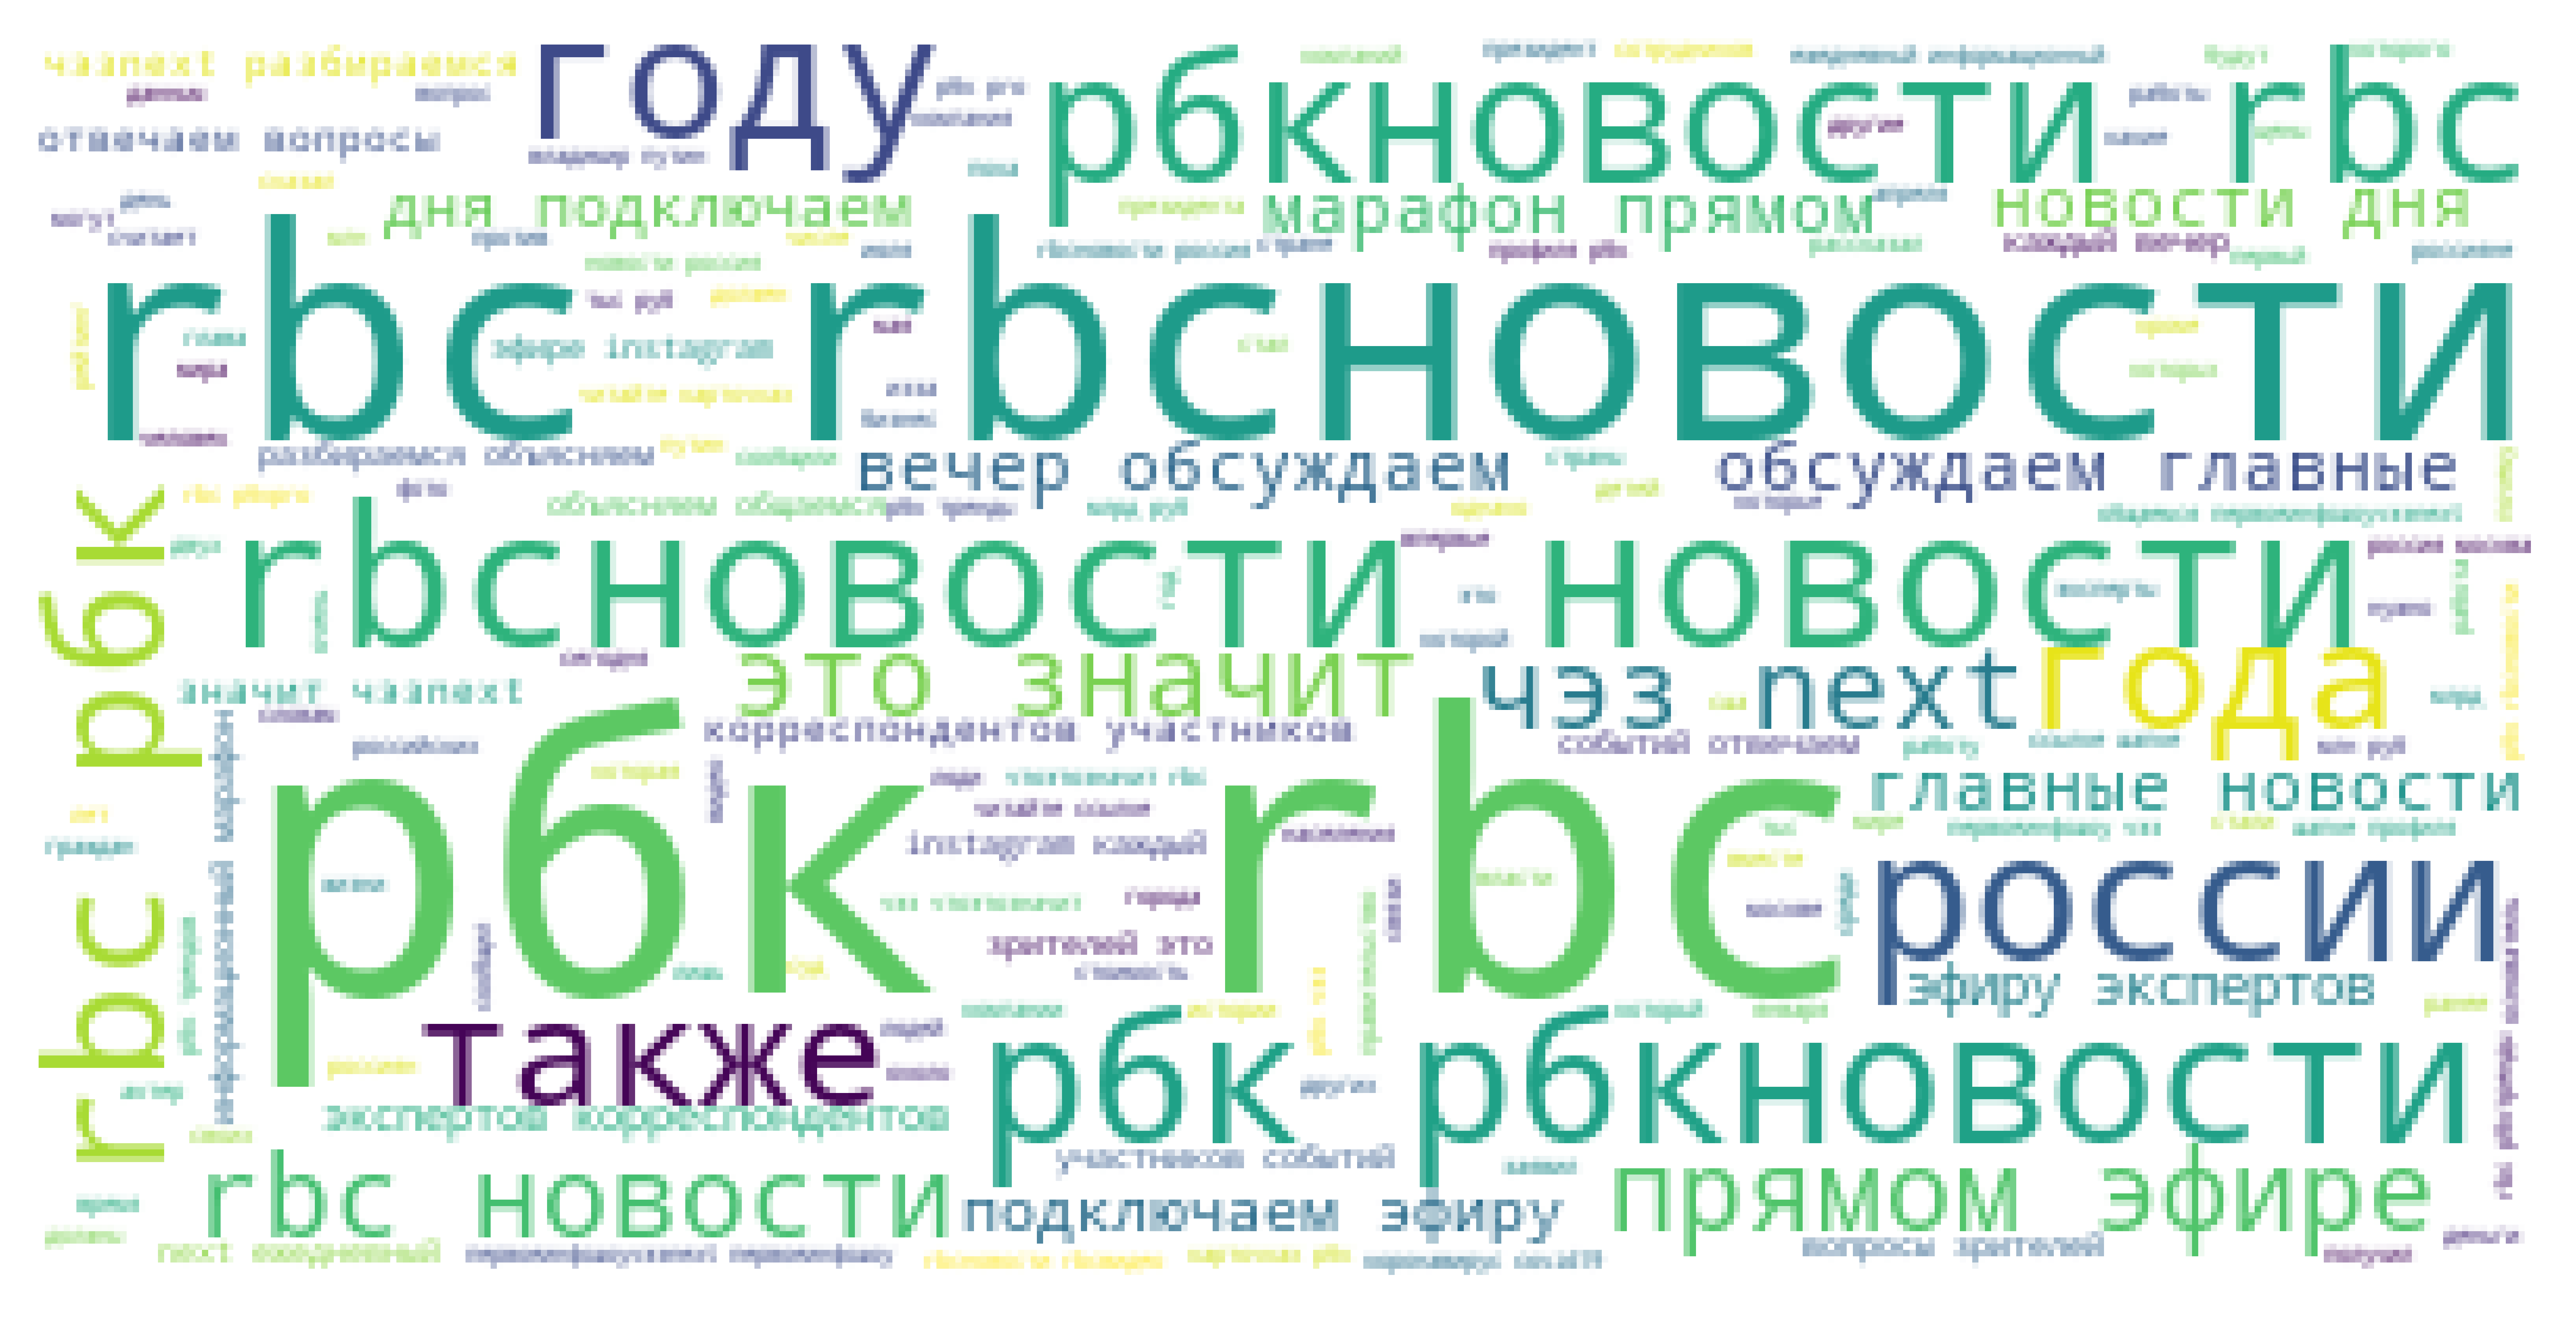

In [126]:
plt.figure(figsize=[10,7], dpi=1200)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [127]:
wordcloud.to_file("wordcloud_rbc.png")

Однако, можно было поступить и проще, просто передав список стоп-слов соответствующему аргументу wordcloud.

In [128]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [129]:
text = " ".join(df['text'].to_list())

In [130]:
wordcloud = WordCloud(stopwords=noise+['rbc', 'rbcновости', 'рбк', 'рбкновости',
                                      'рбк_новости', 'это'], 
                      background_color="white").generate(text)

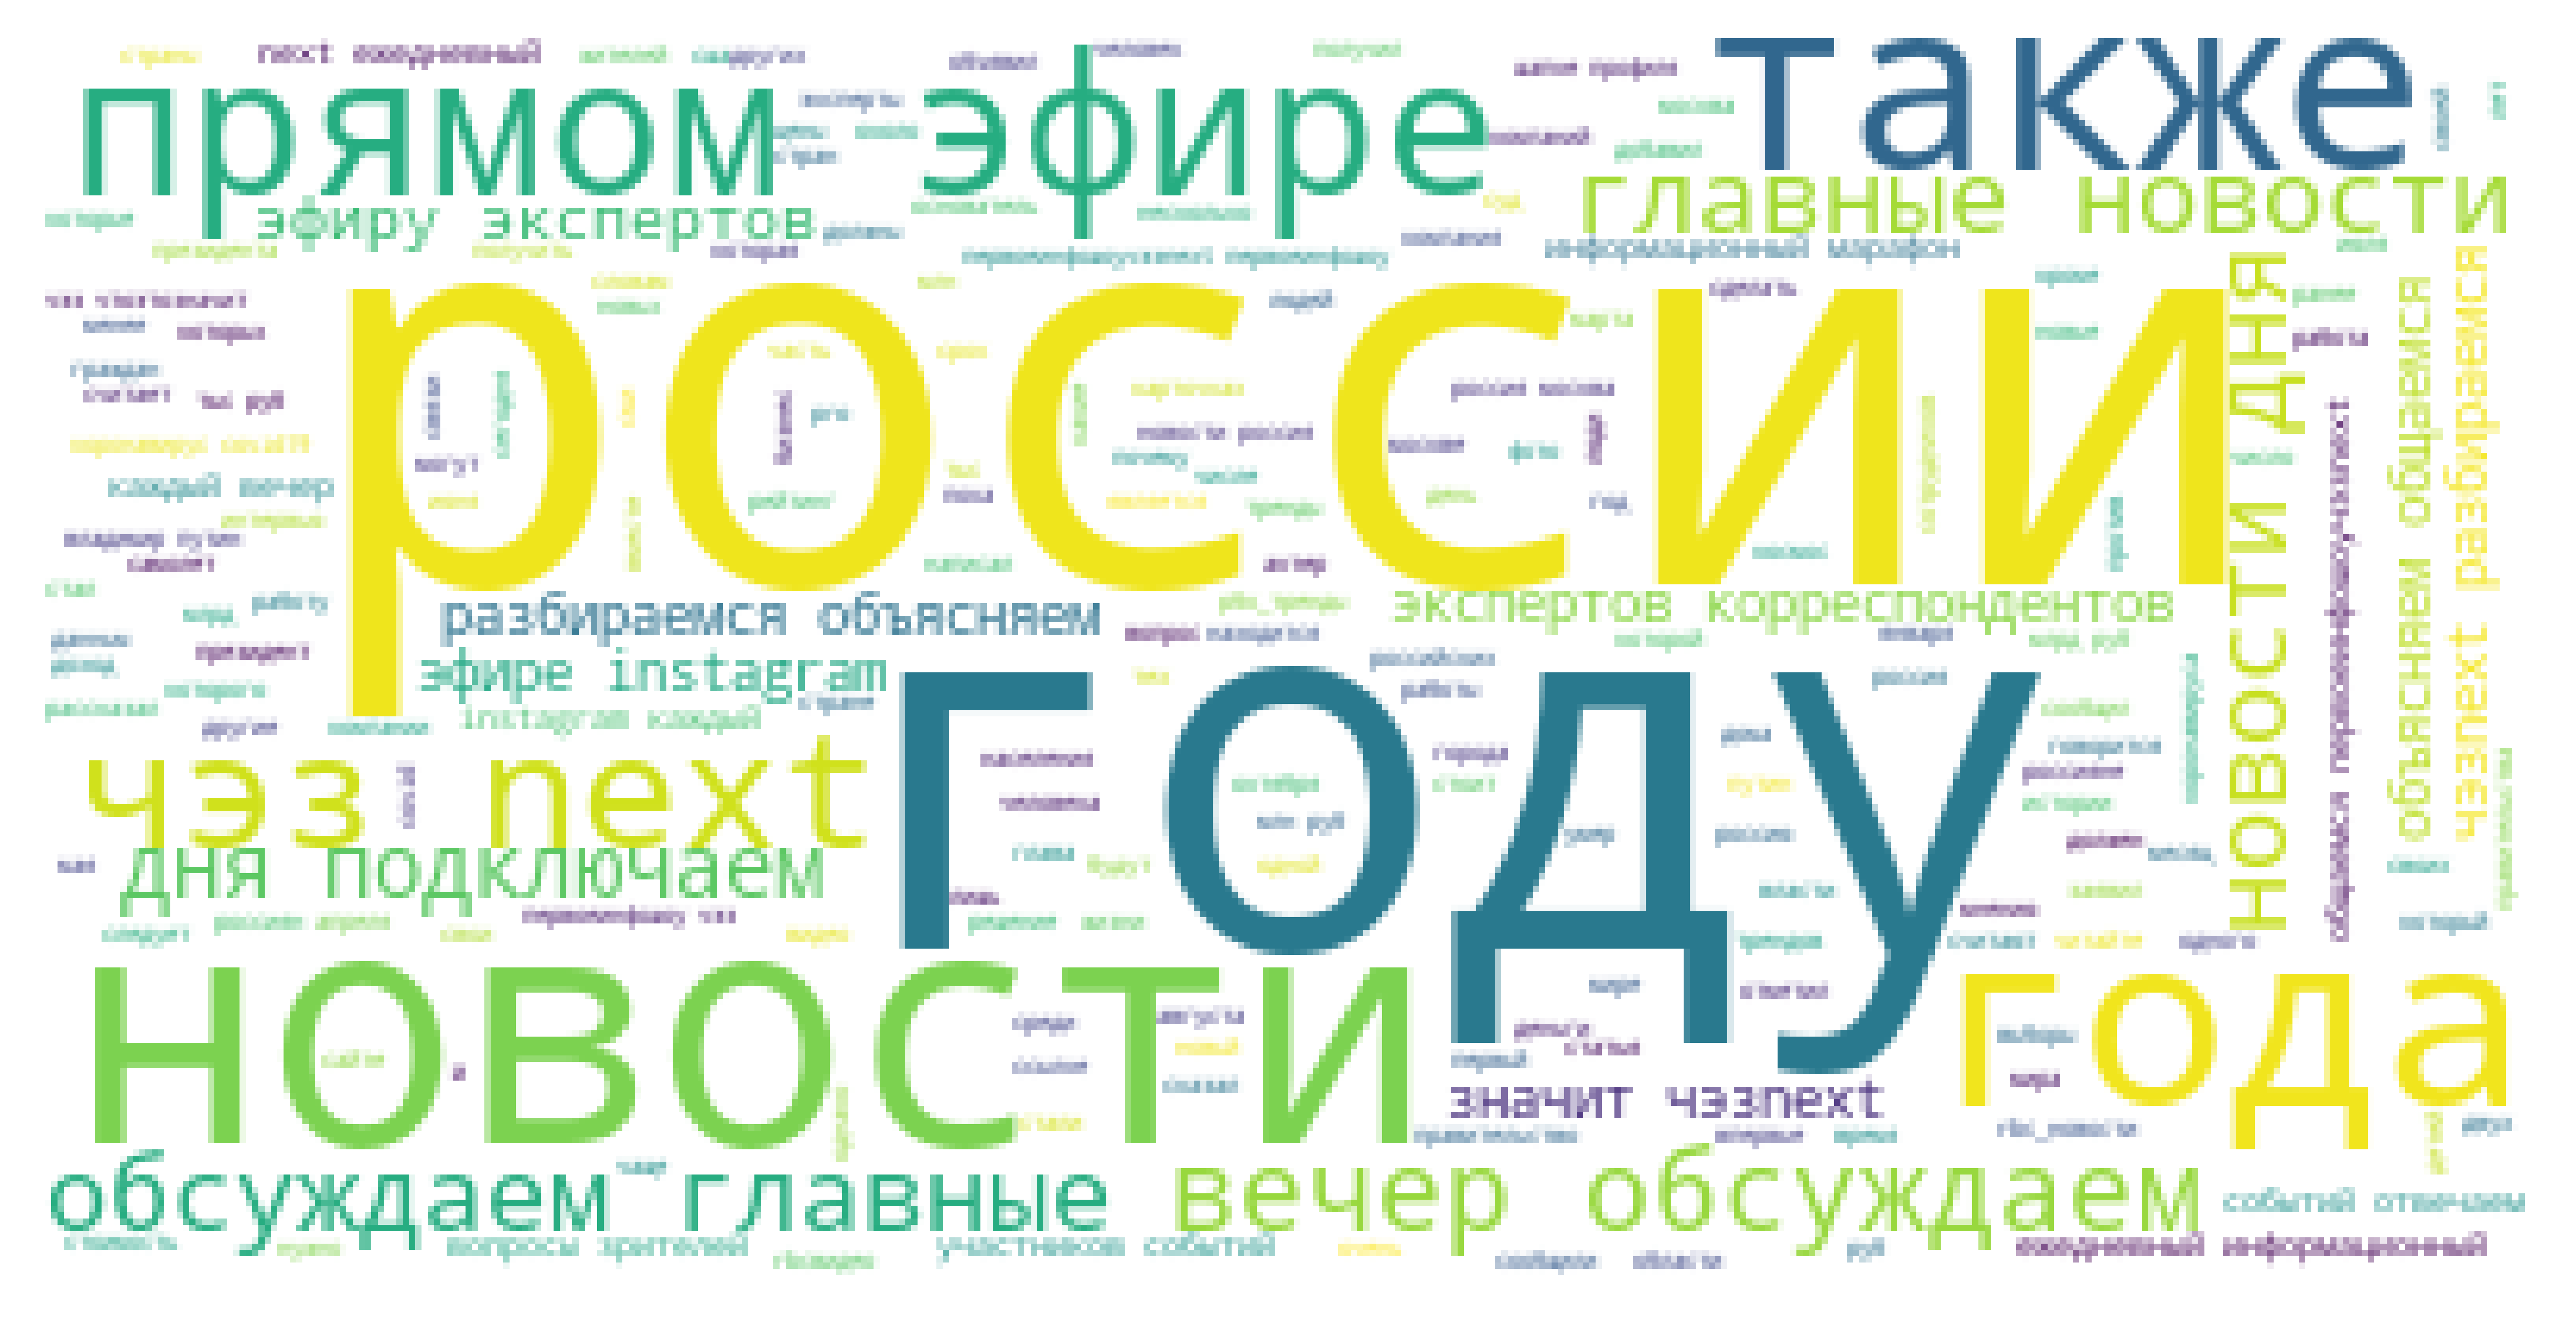

In [131]:
plt.figure(figsize=[10,7], dpi=1200)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

У многих методов для работы с текстами есть похожий аргумент. 

Мы замечаем еще одну интересную особенность – несколько раз повторяются одно и то же слово РБК, написанное по разному. Такие случаи можно убирать вручную (заменить все варианты написания слова на какой-то один). 

Для обычных слов такой процесс называется лемматизацией. Мы приводим все слова к нормальной форме, чтобы учитывать одно слово один раз, а не несколько, как будет в ситуации, если слово написано по-разному. Например, слова "сидели", "сидела", "сидел" заменим на "сидеть".

## Лемматизация

Еще один важный этап предобработки текста.

**Лемматизация** – это сведение разных форм одного слова к начальной форме – **лемме**. Почему это хорошо?
* Во-первых, естественно рассматривать как отдельный признак каждое *слово*, а не каждую его отдельную форму.
* Во-вторых, некоторые стоп-слова стоят только в начальной форме, и без лематизации выкидываем мы только её.

Для русского есть хороший лемматизатор pymorphy. 

[Pymorphy](http://pymorphy2.readthedocs.io/en/latest/) это модуль на питоне, довольно быстрый и с кучей функций.

In [132]:
# устанавливаем pymorphy3
# !pip install pymorphy3

В pymorphy2 для морфологического анализа слов есть ```MorphAnalyzer()```:

In [163]:
from pymorphy3 import MorphAnalyzer
pymorphy3_analyzer = MorphAnalyzer()

pymorphy2 работает с отдельными словами. Если дать ему на вход предложение - он его просто не лемматизирует, т.к. не понимает:

In [164]:
sent = ['Если', 'б', 'мне', 'платили', 'каждый', 'раз']
sent

['Если', 'б', 'мне', 'платили', 'каждый', 'раз']

Лемматизируем слово "платили" из предложения ```sent``` с помощью метода ```parse()```:

In [166]:
ana = pymorphy3_analyzer.parse(sent[3])
ana

[Parse(word='платили', tag=OpencorporaTag('VERB,impf,tran plur,past,indc'), normal_form='платить', score=1.0, methods_stack=((DictionaryAnalyzer(), 'платили', 2471, 10),))]

Выведем его нормальную форму:

In [136]:
ana[0].normal_form

'платить'

Метод `MorphAnalyzer.parse()` принимает слово (обязательно в нижнем регистре) и возвращает все возможные разборы слова:

In [167]:
pymorphy3_analyzer.parse('стали')

[Parse(word='стали', tag=OpencorporaTag('VERB,perf,intr plur,past,indc'), normal_form='стать', score=0.975342, methods_stack=((DictionaryAnalyzer(), 'стали', 945, 4),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='сталь', score=0.010958, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 1),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,nomn'), normal_form='сталь', score=0.005479, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 6),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,datv'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 2),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,loct'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 5),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,accs'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 9),))]

Из [документации](https://pymorphy2.readthedocs.io/en/0.2/user/index.html): 

Обратите внимание, что в этом примере слово “стали” может быть разобрано и как глагол (“они стали лучше справляться”), и как существительное (“кислородно-конверторный способ получения стали”). На основе одной лишь информации о том, как слово пишется, понять, какой разбор правильный, нельзя, поэтому анализатор может возвращать несколько вариантов разбора.

`score` - это оценка P(tag|word), оценка вероятности того, что данный разбор правильный.

Преобразуем наши посты:

In [138]:
text = df['text_no_stopwords'][0]
text

'переговоры — это столкновение двух противоборствующих сторон задачей каждой стоит получить максимум используя свои ресурсы возможности оппонент настаивает чемто вполне можете ответить отказом оппонент пошел попятную рассмотрим методики которые помогут сделать это'

In [168]:
' '.join([pymorphy3_analyzer.parse(word)[0].normal_form for word in text.split()])

'переговоры — это столкновение два противоборствующий сторона задача каждый стоить получить максимум использовать свой ресурс возможность оппонент настаивать чемтый вполне мочь ответить отказ оппонент пойти попятный рассмотреть методика который помочь сделать это'

In [169]:
def lemmatize(text):
    res = [pymorphy3_analyzer.parse(word)[0].normal_form for word in text.split()]
    return ' '.join(res)

In [141]:
df['text_lem'] = df['text_no_stopwords'].apply(lemmatize)

In [142]:
df.head()

,date,comments,likes,text,url,hour,text_no_stopwords,text_lem
0,2021-10-11 16:11:33,25,1812,"переговоры — это столкновение двух и более противоборствующих сторон, где задачей каждой стоит: получить максимум, используя свои ресурсы и возможности. если оппонент настаивает на чем-то, вы вполне можете ответить отказом. но так, чтобы оппонент пошел на попятную. рассмотрим методики, которые помогут сделать это",https://www.instagram.com/p/CWGgCllIUjK/,16,переговоры — это столкновение двух противоборствующих сторон задачей каждой стоит получить максимум используя свои ресурсы возможности оппонент настаивает чемто вполне можете ответить отказом оппонент пошел попятную рассмотрим методики которые помогут сделать это,переговоры — это столкновение два противоборствующий сторона задача каждый стоить получить максимум использовать свой ресурс возможность оппонент настаивать чемтый вполне мочь ответить отказ оппонент пойти попятный рассмотреть методика который помочь сделать это
1,2021-10-11 11:10:42,327,2338,"у белорусско-польской границы мигранты, в большинстве из них — курды, разбили палаточный лагерь. с 8 ноября беженцы прибывают в пограничную зону целыми семьями, пытаясь прорваться в европу. в ночь на 10 ноября двум большим группам мигрантов удалось повредить ограждения и оказаться на территории польши. их задержали. как живут застрявшие у границы беженцы — в подборке рбк\n\n#рбк #рбк_новости #rbc #новости",https://www.instagram.com/p/CWF9nA6opvy/,11,белорусскопольской границы мигранты большинстве — курды разбили палаточный лагерь 8 ноября беженцы прибывают пограничную зону целыми семьями пытаясь прорваться европу ночь 10 ноября двум большим группам мигрантов удалось повредить ограждения оказаться территории польши задержали живут застрявшие границы беженцы — подборке рбк рбк рбкновости rbc новости,белорусскопольский граница мигрант большинство — курд разбить палаточный лагерь 8 ноябрь беженец прибывать пограничный зона целый семья пытаться прорваться европа ночь 10 ноябрь два больший группа мигрант удаться повредить ограждение оказаться территория польша задержать жить застрять граница беженец — подборка рбк рбк рбкновость rbc новость
2,2021-09-11 16:52:42,83,4252,большинство из нас слышали про необходимость пройти 10 000 шагов в день для поддержания здоровья. но откуда взялась эта цифра и действительно ли совет помогает держать себя в форме — об этом в карточках рбк спорт\n\n#рбк #рбк_новости #rbc #статья #спорт,https://www.instagram.com/p/CWD_9EHIf_K/,16,большинство слышали необходимость пройти 10 000 шагов день поддержания здоровья откуда взялась эта цифра действительно совет помогает держать форме — карточках рбк спорт рбк рбкновости rbc статья спорт,большинство слышать необходимость пройти 10 000 шаг день поддержание здоровье откуда взяться этот цифра действительно совет помогать держать форма — карточка рбк спорт рбк рбкновость rbc статья спорт
3,2021-09-11 13:29:03,27,1500,"покупка мужского костюма — интересный процесс, который в своем развитии преодолел ряд этапов. от долгих примерок до покупки в пару кликов. вместе с suitsupply рассказываем об этом в карточках. листайте 👉\n\nссылка на недавно открывшийся онлайн-магазин suitsupply в описании профиля.",https://www.instagram.com/p/CWDophIN18s/,13,покупка мужского костюма — интересный процесс который своем развитии преодолел ряд этапов долгих примерок покупки пару кликов вместе suitsupply рассказываем карточках листайте 👉 ссылка недавно открывшийся онлайнмагазин suitsupply описании профиля,покупка мужской костюм — интересный процесс который свой развитие преодолеть ряд этап долгий примерка покупка пара клик вместе suitsupply рассказывать карточка листать 👉 ссылка недавно открыться онлайнмагазин suitsupply описание профиль
4,2021-08-11 15:45:42,44,2214,"предприниматели грядущих десятилетий будут отличаться от своих предшественников, живших в середине прошлого столетия, или от наших современников. основные тренды, влияющие на формирование предпринимателей будущего — в карточках и м

## n-граммы
Самые мелкие структуры языка, с которыми мы работаем, называются n-граммами. У n-граммы есть параметр n - количество слов, которые попадают в такое представление текста.

* Если n = 1 - то мы смотрим на то, сколько раз каждое слово встретилось в тексте. Получаем униграммы
* Если n = 2 - то мы смотрим на то, сколько раз каждая пара подряд идущих слов, встретилась в тексте. Получаем биграммы


Функция для работы с n-граммами реализована в библиотке **nltk** (Natural Language ToolKit), импортируем эту функцию: 

In [143]:
from nltk import ngrams

Прежде чем получать n-граммы, нужно разделить предложение на отдельные слова.  Для этого используем метод ```split()```.

In [144]:
sentence = 'Если б мне платили каждый раз'.split()
sentence

['Если', 'б', 'мне', 'платили', 'каждый', 'раз']

Чтобы получить n-грамму для такой последовательности, используем функцию ```ngrams()```. 

На вход передается два параметра:
* лист с разделенным на отдельные слова предложением (у нас он хранится в переменной ```sent```);
* параметр n, определяющий, какой тип n-грамм мы хотим получить.


Чтобы полученный объект отобразить, делаем из него ```list```. 

In [145]:
list(ngrams(sentence, 1)) # униграммы

[('Если',), ('б',), ('мне',), ('платили',), ('каждый',), ('раз',)]

Аналогично мы можем получить биграммы - для этого заменяем параметр **n** в функции **ngrams** с 1 на 2.

In [146]:
list(ngrams(sentence, 2)) # биграммы

[('Если', 'б'),
 ('б', 'мне'),
 ('мне', 'платили'),
 ('платили', 'каждый'),
 ('каждый', 'раз')]

In [147]:
list(ngrams(sentence, 3)) # триграммы

[('Если', 'б', 'мне'),
 ('б', 'мне', 'платили'),
 ('мне', 'платили', 'каждый'),
 ('платили', 'каждый', 'раз')]

In [148]:
list(ngrams(sentence, 5)) # ... пентаграммы?

[('Если', 'б', 'мне', 'платили', 'каждый'),
 ('б', 'мне', 'платили', 'каждый', 'раз')]

## Векторизаторы

Векторизатор преобразует слово или набор слов в числовой вектор, понятный алгоритму машинного обучения, который привык работать с числовыми табличными данными.

Ниже - пример преобразования слов в двумерный вектор, каждому слову соответствует точка на плоскости.

<a href="https://drive.google.com/uc?id=1ukv-FTj0jeVdcgVlOaNBocUfNuYGGVZg
" target="_blank"><img src="https://drive.google.com/uc?id=1ukv-FTj0jeVdcgVlOaNBocUfNuYGGVZg" 
alt="IMAGE ALT TEXT HERE" width="600" border="0" /></a>

In [149]:
from sklearn.feature_extraction.text import CountVectorizer # модель "мешка слов", см. далее

Самый простой способ извлечь признаки из текстовых данных -- векторизаторы: `CountVectorizer` и `TfidfVectorizer`

Объект `CountVectorizer` делает следующую вещь:
* строит для каждого документа (каждой пришедшей ему строки) вектор размерности `n`, где `n` -- количество слов или n-грам во всём корпусе
* заполняет каждый i-тый элемент количеством вхождений слова в данный документ

<a href="https://drive.google.com/uc?id=1ukv-FTj0jeVdcgVlOaNBocUfNuYGGVZg
" target="_blank"><img src="https://drive.google.com/uc?id=1jHmkrGZTMawM46Yzxh243Ur1y5pYKzrl" 
alt="IMAGE ALT TEXT HERE" width="600" border="0" /></a>

На рисунке пример векторизации для униграмм, но можно использовать любые n-граммы. Для этого у объекта ```CountVectorizer()``` есть параметр **ngram_range**, который отвечает за то, какие n-граммы мы используем в качестве признаов:<br/>
ngram_range=(1, 1) -- униграммы<br/>
ngram_range=(3, 3) -- триграммы<br/>
ngram_range=(1, 3) -- униграммы, биграммы и триграммы.

<a href="https://drive.google.com/uc?id=1ODNVK0fdLTX4nv6ob55ciUe37d1pio-D" target="_blank"><img src="https://drive.google.com/uc?id=1ODNVK0fdLTX4nv6ob55ciUe37d1pio-D" 
alt="IMAGE ALT TEXT HERE" width="800" border="0" /></a>

Инициализируем ```CountVectorizer()```, указав в качестве признаков униграммы:

In [150]:
vectorizer = CountVectorizer(ngram_range=(1, 1))

После инициализации _vectorizer_ можно обучить на наших данных. 

Для обучения используем наши посты. Мы используем метод ```fit_transform()```: сначала обучаем наш векторизатор, а потом сразу применяем его к нашему набору данных. 


In [151]:
vectorized_text = vectorizer.fit_transform(df['text_lem'])

In [152]:
vectorized_text.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

Так как результат не зависит от порядка слов в текстах, то говорят, что такая модель представления текстов в виде векторов получается из *гипотезы представления текста как мешка слов*

В vectorizer.vocabulary_ лежит словарь, отображение слов в их индексы:

In [153]:
list(vectorizer.vocabulary_.items())[:10]

[('переговоры', 11758),
 ('это', 18315),
 ('столкновение', 15888),
 ('два', 5562),
 ('противоборствующий', 13515),
 ('сторона', 15902),
 ('задача', 6552),
 ('каждый', 7504),
 ('стоить', 15876),
 ('получить', 12480)]

В нашей выборке 2688 текстов (постов), в них встречается 18470 разных слов.

In [154]:
vectorized_text.shape

(2688, 18470)

Так как теперь у нас есть **численное представление** и набор входных признаков, то мы можем обучать модели машинного обучения. Мы машинное обучение не проходили, поэтому давайте попробуем просто посчитать похожесть постов. 

## Вычисляем похожие посты

## TF-IDF векторизация

`TfidfVectorizer` делает то же, что и `CountVectorizer`, но в качестве значений выдает **tf-idf** каждого слова.

Как считается tf-idf:

**TF (term frequency)** – отношение числа вхождений некоторого слова к общему числу слов документа:
$$ TF(t,d) = \frac{n_{t}}{\sum_k n_{k}} $$

**IDF (inverse document frequency)** – обратная частота документов, в которых есть это слово:
$$ IDF(t, D) = \mbox{log} \frac{|D|}{|{d : t \in d}|} $$

Перемножаем их:
$$TFIDF(t, d, D) = TF(t,d) \times IDF(i, D)$$

Сакральный смысл: если слово часто встречается в одном документе, но в целом по корпусу встречается в небольшом 
количестве документов, у него высокий TF-IDF.

In [155]:
df.iloc[0, 3]

'переговоры — это столкновение двух и более противоборствующих сторон, где задачей каждой стоит: получить максимум, используя свои ресурсы и возможности. если оппонент настаивает на чем-то, вы вполне можете ответить отказом. но так, чтобы оппонент пошел на попятную. рассмотрим методики, которые помогут сделать это'

In [156]:
df.iloc[0, 3].count('переговоры')

1

In [157]:
len(df.iloc[0, 3].split())

43

In [158]:
tf = 1 / 43

In [159]:
df['text'].str.contains('переговоры').sum()

17

In [160]:
df.shape[0]

2688

In [170]:
idf = np.log(2688/17)

In [171]:
tf * idf

0.11775207808341451

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer

Действуем аналогично, как с ```CountVectorizer()```:

In [173]:
# инициализируем векторизатор, в качестве переменных используем униграммы
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))

In [174]:
tfidf_vectorized_text = tfidf_vectorizer.fit_transform(df['text_lem'])

In [175]:
tfidf_vectorized_text

<2688x18470 sparse matrix of type '<class 'numpy.float64'>'
	with 111816 stored elements in Compressed Sparse Row format>

Посчитаем похожие посты и здесь.

In [176]:
def get_distances(i, vectorized):
    text_id = i
    matrix = vectorized.todense()
    vec = matrix[text_id]
    dist = np.power(matrix - vec, 2)
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    return dist.ravel().tolist()[0]

In [177]:
df['tfidf_dist'] = get_distances(i=0, vectorized=tfidf_vectorized_text)

In [178]:
df.sort_values('tfidf_dist').iloc[1:11]

,date,comments,likes,text,url,hour,text_no_stopwords,text_lem,tfidf_dist
671,2021-04-04 16:39:00,34,3318,"переговоры напряженные. от их результата многое зависит, а оппонент продавливает свои интересы с помощью уловок. какие имеются приемы у манипулятора и как найти способы для их нейтрализации ― читайте в карточках рбк pro \n\nполную версию статьи читайте по ссылке в шапке профиля\n\n#рбк #рбк_новости #rbc #статья",https://www.instagram.com/p/CNQETFTlniG/,16,переговоры напряженные результата многое зависит оппонент продавливает свои интересы помощью уловок какие имеются приемы манипулятора найти способы нейтрализации ― читайте карточках рбк pro полную версию статьи читайте ссылке шапке профиля рбк рбкновости rbc статья,переговоры напрячь результат многое зависеть оппонент продавливать свой интерес помощь уловка какой иметься приём манипулятор найти способ нейтрализация ― читать карточка рбк pro полный версия статья читать ссылка шапка профиль рбк рбкновость rbc статья,1.306684
114,2021-09-24 17:26:44,103,2982,"интернет полон советов о том, как лучше инвестировать сбережения. а как этого точно делать не стоит? @rbc_investments спросили экспертов и выделили шесть худших вещей, которые вы можете сделать со своими деньгами\n\n#рбк #рбк_новости #rbc #статья",https://www.instagram.com/p/CUNnSDTIiYC/,17,интернет полон советов инвестировать сбережения точно делать стоит rbcinvestments спросили экспертов выделили шесть худших вещей которые можете сделать своими деньгами рбк рбкновости rbc статья,интернет полный совет инвестировать сбережение точно делать стоить rbcinvestments спросить эксперт выделить шесть плохой вещь который мочь сделать свой деньга рбк рбкновость rbc статья,1.347065
417,2021-11-06 20:18:07,100,3646,"интернет полон советов о том, как лучше инвестировать сбережения. а как этого точно делать не стоит?\n\n@rbc_investments спросили экспертов и выделили шесть худших вещей, которые вы можете сделать со своими деньгами\n\n#рбк #рбк_новости #rbc #новости #инвестиции",https://www.instagram.com/p/CP_jbgLFehL/,20,интернет полон советов инвестировать сбережения точно делать стоит rbcinvestments спросили экспертов выделили шесть худших вещей которые можете сделать своими деньгами рбк рбкновости rbc новости инвестиции,интернет полный совет инвестировать сбережение точно делать стоить rbcinvestments спросить эксперт выделить шесть плохой вещь который мочь сделать свой деньга рбк рбкновость rbc новость инвестиция,1.347944
194,2021-08-25 17:30:21,58,2246,"при рассказе о своих слабых сторонах оставайтесь спокойным и уверенным, не извиняйтесь и не смущайтесь. наоборот, покажите, что вы о них знаете, умеете о них говорить и понимаете, как над ними работать. подробнее о том, как правильно ответить на вопрос о ваших слабых сторонах — в карточках рбк",https://www.instagram.com/p/CTAX2R3jE-Y/,17,рассказе своих слабых сторонах оставайтесь спокойным уверенным извиняйтесь смущайтесь наоборот покажите знаете умеете говорить понимаете ними работать подробнее правильно ответить вопрос ваших слабых сторонах — карточках рбк,рассказ свой слабый сторона оставаться спокойный уверенный извиняться смущаться наоборот показать знать уметь говорить понимать они работать подробный правильно ответить вопрос ваш слабый сторона — карточка рбк,1.356693
652,2021-11-04 14:03:20,49,1941,"работодатели часто спрашивают на собеседовании об ожиданиях по заработной плате. как ответить на этот непростой вопрос, чтобы не занизить свой будущий доход? как подготовиться к таким переговорам ― читайте в карточках рбк pro\n\nчитайте статью по ссылке в шапке профиля \n\n#рбк #рбк_новости #rbc #статья",https://www.instagram.com/p/CNh0DDDls8x/,14,работодатели часто спрашивают собеседовании ожиданиях заработной плате ответить непростой вопрос занизить свой будущий доход подготовиться таким переговорам ― читайте карточках рбк pro читайте статью ссылке шапке профиля рбк рбкновости rbc статья,работодатель часто спрашивать собеседование ожидание заработный плата ответить непростой во

In [179]:
similar_posts = df.sort_values('tfidf_dist').iloc[1:11, 3]

In [180]:
links = df.sort_values('tfidf_dist').iloc[1:11, 4]

Пост, к которому ищем похожие:

In [181]:
df.loc[0, 'text']

'переговоры — это столкновение двух и более противоборствующих сторон, где задачей каждой стоит: получить максимум, используя свои ресурсы и возможности. если оппонент настаивает на чем-то, вы вполне можете ответить отказом. но так, чтобы оппонент пошел на попятную. рассмотрим методики, которые помогут сделать это'

Топ-10 похожих постов при использовании TF-IDF векторизации:

In [182]:
for post, link in zip(similar_posts, links):
    print(post)
    print(link)
    print()

переговоры напряженные. от их результата многое зависит, а оппонент продавливает свои интересы с помощью уловок. какие имеются приемы у манипулятора и как найти способы для их нейтрализации ― читайте в карточках рбк pro 

полную версию статьи читайте по ссылке в шапке профиля

#рбк #рбк_новости #rbc #статья
https://www.instagram.com/p/CNQETFTlniG/

интернет полон советов о том, как лучше инвестировать сбережения. а как этого точно делать не стоит? @rbc_investments спросили экспертов и выделили шесть худших вещей, которые вы можете сделать со своими деньгами

#рбк #рбк_новости #rbc #статья
https://www.instagram.com/p/CUNnSDTIiYC/

интернет полон советов о том, как лучше инвестировать сбережения. а как этого точно делать не стоит?

@rbc_investments спросили экспертов и выделили шесть худших вещей, которые вы можете сделать со своими деньгами

#рбк #рбк_новости #rbc #новости #инвестиции
https://www.instagram.com/p/CP_jbgLFehL/

при рассказе о своих слабых сторонах оставайтесь спокойным и 

Уже гораздо лучше – мы выделили несколько постов, где речь также идет о переговорах! Если дома Вам захочется еще сильнее улучшить качество, то можете посмотреть на нейросетевые модели, с помощью которых можно получить эмбеддинги (векторные представления) слов / предложений. Например, [word2vec](https://medium.com/@bigdataschool/%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5-nlp-%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8-word2ve%D1%81-%D0%BD%D0%B0-%D1%80%D1%83%D1%81%D1%81%D0%BA%D0%B8%D1%85-%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0%D1%85-%D1%81-python-aa10528b99c1).